# Omya database in MySQL

![DDBB - omya DDBB.jpg](<attachment:DDBB - omya DDBB.jpg>)
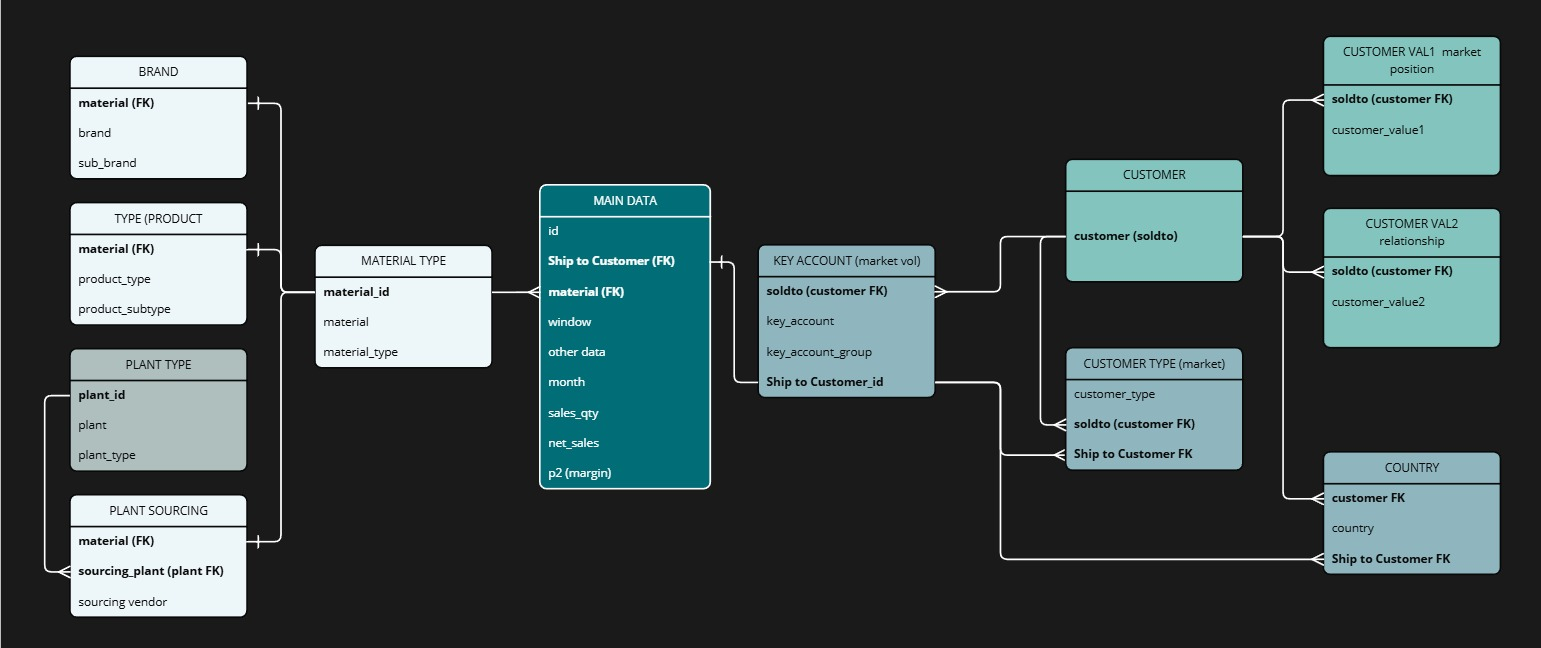

**Orden de creacion de tablas**

* material_type (PK)
* customer (PK)
* plant_type (PK)
* key_account
    * ship_to_customer (PK)
    * soldto (customer FK)

*tablas con FK solo*

* brand (material FK)
* type_product (material FK)
* plant_sourcing
    * material FK
    * sourcing_plant (plant FK)
* customer_market_pos (customer_val1)
    * soldto (customer FK)
* customer_relationship (customer_val2)
    * soldto (customer FK)
* country
    * customer FK
    * ship_to_customer FK
* customer_type
    * soldto (customer FK)
    * ship_to_customer FK
* sales (main_data)
    * material FK
    * ship_to_customer FK

**No es necesario ejecutar, ingreso de datos csv a MySQL Workbench**

pip install mysql-connector-python

In [1]:
import pandas as pd
import mysql.connector

from modules.mysql_funct import *

In [2]:
src_f = "omya/sources/"
name_list = ["brand", "material_attribute", "plant_type", "plant_sourcing", "material_type", "sales",
             "key_account", "customer", "customer_market", "customer_market_pos",
             "customer_relationship", "country"]

# funcion nueva: read_csv para batch de ficheros csv
def csv_a_pd(ruta_raiz, csv_list_name, index=0):
    return pd.read_csv(ruta_raiz + csv_list_name[index] +".csv")

df_brand     = csv_a_pd(src_f, name_list, 0)
df_mat_attr  = csv_a_pd(src_f, name_list, 1)
df_plant_tp  = csv_a_pd(src_f, name_list, 2)
df_plant_src = csv_a_pd(src_f, name_list, 3)
df_mat_type  = csv_a_pd(src_f, name_list, 4)
df_sales     = csv_a_pd(src_f, name_list, 5)
df_key_acc   = csv_a_pd(src_f, name_list, 6)
df_customer  = csv_a_pd(src_f, name_list, 7)
df_c_market  = csv_a_pd(src_f, name_list, 8)
df_mkt_pos   = csv_a_pd(src_f, name_list, 9)
df_relation  = csv_a_pd(src_f, name_list, 10)
df_country   = csv_a_pd(src_f, name_list, 11)

In [3]:
# creates the db
# de tener otros user y host, define la variable
database = "omya_ddbb"
create_database(database = database,
                password = password,
                user     = user,
                host     = host)

Create a txt with full first part query with independent tables, and a second one with dependent tables (with FK)
* first tables must have defined PK after creating columns
* this columns are not INT but alphanumeric

In [4]:
# create tables from script

script_f = "/scripts/"
query_schema = open(script_f+ "omya_schema_py.txt", "r").read()

execute_query(query    = query_schema,
              database = database,
              password = password,
              user     = user,
              host     = host)

In [5]:
df_list = [df_mat_type, df_customer, df_plant_tp, df_key_acc, df_brand, df_mat_attr,
           df_plant_src, df_mkt_pos, df_relation, df_country, df_c_market]
table_list = ["material_types", "customers", "plant_types", "key_accounts", "brands", "product_attr",
              "plant_sourcing", "c_market_position", "c_relationship", "countries", "customer_types"]

In [6]:
# populate tables

for df, t in zip(df_list, table_list):
    print(t)
    insert_to_table(data     = df,
                    table    = t,
                    in_from  = 0,
                    database = database,
                    password = password,
                    user     = user,
                    host     = host)

material_types
Añadidas: 9999 filas
customers
Añadidas: 5707 filas
plant_types
Añadidas: 800 filas
key_accounts
Añadidas: 9999 filas
brands
Añadidas: 9999 filas
product_attr
Añadidas: 9999 filas
plant_sourcing
Añadidas: 9999 filas
c_market_position
Añadidas: 8784 filas
c_relationship
Añadidas: 8819 filas
countries
Añadidas: 9999 filas
customer_types
Añadidas: 9999 filas


In [5]:
# fill nan values with "" to populate sales table
df_sales_c = df_sales.copy()
df_sales_c.fillna(value = "",
                  inplace=True
                  )
#df_sales_c.head(3)

In [19]:
# populate sales table only

insert_to_table(data     = df_sales_c,
                table    = "sales",
                in_from  = 1,
                database = database,
                password = password,
                user     = user,
                host     = host)

Añadidas: 100000 filas


Move to omya_eda notebook to visualize data